In [1]:
import HTSeq
import glob
import matplotlib.pyplot as plt
import seaborn
import numpy
from scipy.stats.stats import pearsonr
import itertools


In [2]:
Genome_lengths = {}

for cfile in glob.glob('Studied_genomes/*.fasta'):
    total = 0
    for read in HTSeq.FastaReader(cfile):
        total += len(read.seq)
    Genome_lengths[cfile.split('/')[1].split('.')[0]] = total
    
    
Genome_lengths['Methanopyrus kandleri'] = 1694969


In [3]:

Genome_lengths

{'Aeropyrum pernix': 1669696,
 'Aquifex aeolicus': 1551335,
 'Archaeoglobus fulgidus': 2178400,
 'Hyperthermus butyilicus': 1667163,
 'Methanococcus jannaschii': 1664970,
 'Methanopyrus kandleri': 1694969,
 'Methanopyrus kandleri AV19': 1694969,
 'Methanothermus fervidus': 1243342,
 'Pyrococcus furiosus': 1908256,
 'Pyrodicitium abyssi': 1765118,
 'Pyrolobus fumarii': 1843267,
 'Sulfolobus acidocaldarius': 2225959,
 'Thermocrinis minervae': 1367921,
 'Thermocrinis ruber': 1521037,
 'Thermotoga maritima': 1860725}

In [4]:
bases_annotated = {}

for cfile in glob.glob('CDS_extracted/*.fa'):
    print cfile
    temp = {}
    name = cfile.split('/')[1].split('.')[0].replace('_',' ')
    for read in HTSeq.FastaReader(cfile):
        start = read.name.split('...')[0]
        end = read.name.split('...')[1].split('.')[0]
        #print start,end
        for i in range(int(start),int(end)):
            #print i
            if i in temp:
                temp[i] += 1
            else:
                temp[i] = 1
    bases_annotated[name] = temp

CDS_extracted/Aeropyrum_pernix.CDS.fa
CDS_extracted/Aquifex_aeolicus.CDS.fa
CDS_extracted/Archaeoglobus_fulgidus.CDS.fa
CDS_extracted/Hyperthermus_butyilicus.CDS.fa
CDS_extracted/Methanococcus_jannaschii.CDS.fa
CDS_extracted/Methanopyrus_kandleri.CDS.fa
CDS_extracted/Methanothermus_fervidus.CDS.fa
CDS_extracted/Pyrococcus_feriosus.CDS.fa
CDS_extracted/Pyrodicitium_abyssi.CDS.fa
CDS_extracted/Pyrolobus_fumarii.CDS.fa
CDS_extracted/Sulfolobus_acidocaldarius.CDS.fa
CDS_extracted/Thermocrinis_minervae.CDS.fa
CDS_extracted/Thermocrinis_ruber.CDS.fa
CDS_extracted/Thermotoga_maritima.CDS.fa


In [5]:
bases_annotated

{'Aeropyrum pernix': {213: 1,
  214: 1,
  215: 1,
  216: 1,
  217: 1,
  218: 1,
  219: 1,
  220: 1,
  221: 1,
  222: 1,
  223: 1,
  224: 1,
  225: 1,
  226: 1,
  227: 1,
  228: 1,
  229: 1,
  230: 1,
  231: 1,
  232: 1,
  233: 1,
  234: 1,
  235: 1,
  236: 1,
  237: 1,
  238: 1,
  239: 1,
  240: 1,
  241: 1,
  242: 1,
  243: 1,
  244: 1,
  245: 1,
  246: 1,
  247: 1,
  248: 1,
  249: 1,
  250: 1,
  251: 1,
  252: 1,
  253: 1,
  254: 1,
  255: 1,
  256: 1,
  257: 1,
  258: 1,
  259: 1,
  260: 1,
  261: 1,
  262: 1,
  263: 1,
  264: 1,
  265: 1,
  266: 1,
  267: 1,
  268: 1,
  269: 1,
  270: 1,
  271: 1,
  272: 1,
  273: 1,
  274: 1,
  275: 1,
  276: 1,
  277: 1,
  278: 1,
  279: 1,
  280: 1,
  281: 1,
  282: 1,
  283: 1,
  284: 1,
  285: 1,
  286: 1,
  287: 1,
  288: 1,
  289: 1,
  290: 1,
  291: 1,
  292: 1,
  293: 1,
  294: 1,
  295: 1,
  296: 1,
  297: 1,
  298: 1,
  299: 1,
  300: 1,
  301: 1,
  302: 1,
  303: 1,
  304: 1,
  305: 1,
  306: 1,
  307: 1,
  308: 1,
  309: 1,
  310: 1,


Methanothermus fervidus
93.2109588512
Aquifex aeolicus
91.1362149375
Thermocrinis minervae
96.2832648961
Aeropyrum pernix
88.3092491088
Methanopyrus kandleri
88.6130070815
Pyrodicitium abyssi
92.4773867809
Methanococcus jannaschii
87.4546688529
Sulfolobus acidocaldarius
87.0302193347
Archaeoglobus fulgidus
91.7553709144
Thermotoga maritima
93.9124803504
Pyrolobus fumarii
85.9133809698
Hyperthermus butyilicus
83.6168389054
Thermocrinis ruber
95.1822999703
Min; 83.6168389054
Max; 96.2832648961
Average; 90.3765646888


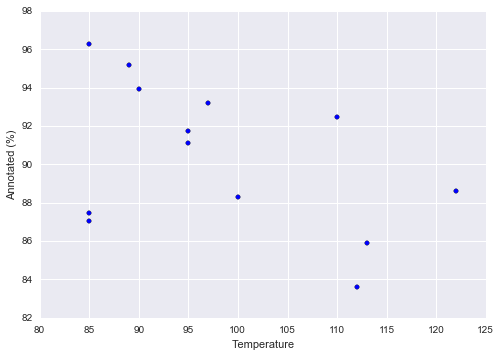

(-0.45537782367124746, 0.11788758679183031)


In [11]:
values = []

for genome, length in Genome_lengths.iteritems():
    try:
        annotated = len(bases_annotated[genome])
        print genome
        print (float(annotated)/length)*100
        values.append((float(annotated)/length)*100)
    except:
        continue
    

Temp = [97,95,85,100,122,110,85,85,95,90,113,112,89]

print 'Min; ' + str(min(values))
print 'Max; ' + str(max(values))
print 'Average; ' + str(float(sum(values))/float(len(values)))

plt.scatter(Temp,values)
plt.xlabel('Temperature ')
plt.ylabel('Annotated (%) ')
plt.show()
print pearsonr(Temp,values )


Methanothermus fervidus
0.371204152793
Aquifex aeolicus
0.697468150298
Thermocrinis minervae
0.668448893347
Aeropyrum pernix
0.348593688962
Methanopyrus kandleri
0.54089215247
Pyrodicitium abyssi
0.457442865588
Methanococcus jannaschii
0.142367182339
Sulfolobus acidocaldarius
0.466277835104
Archaeoglobus fulgidus
0.447118494656
Thermotoga maritima
0.639845535187
Pyrolobus fumarii
0.368524380641
Hyperthermus butyilicus
0.363478808547
Thermocrinis ruber
0.594298218349


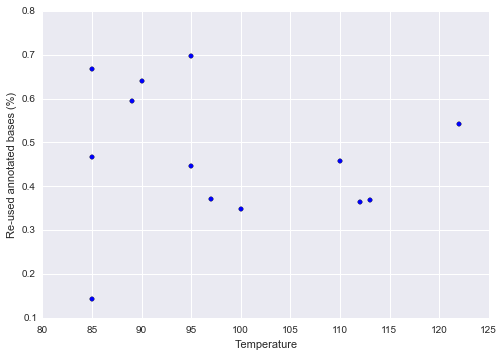

(-0.1283952040291414, 0.67592703518678965)


In [8]:
values = []
for genome, length in Genome_lengths.iteritems():
    try:
        total = 0
        annotated = bases_annotated[genome]
        for k, v in annotated.iteritems():
            if v >1:
                total +=1
        print genome
        print (float(total)/len(annotated))*100
        values.append((float(total)/len(annotated))*100)
    except:
        continue
        
        
Temp = [97,95,85,100,122,110,85,85,95,90,113,112,89]

plt.scatter(Temp,values)
plt.xlabel('Temperature ')
plt.ylabel('Re-used annotated bases (%) ')
plt.show()
print pearsonr(Temp,values )
